# AIT Development notebook

## notebook of structure

| #  | Name                                               | cells | for_dev | edit               | description                                                                |
|----|----------------------------------------------------|-------|---------|--------------------|----------------------------------------------------------------------------|
| 1  | [Environment detection](##1-Environment-detection) | 1     | No      | uneditable         | detect whether the notebook are invoked for packaging or in production     |
| 2  | [Preparing AIT SDK](##2-Preparing-AIT-SDK)         | 1     | Yes     | uneditable         | download and install AIT SDK                                               |
| 3  | [Dependency Management](##3-Dependency-Management) | 3     | Yes     | required(cell #2)  | generate requirements.txt for Docker container                             |
| 4  | [Importing Libraries](##4-Importing-Libraries)     | 2     | Yes     | required(cell #1)  | import required libraries                                                  |
| 5  | [Manifest Generation](##5-Manifest-Generation)     | 1     | Yes     | required           | generate AIT Manifest                                                      |
| 6  | [Prepare for the Input](##6-Prepare-for-the-Input) | 1     | Yes     | required           | generate AIT Input JSON (inventory mapper)                                 |
| 7  | [Initialization](##7-Initialization)               | 1     | No      | uneditable         | initialization for AIT execution                                           |
| 8  | [Function definitions](##8-Function-definitions)   | N     | No      | required           | define functions invoked from Main area.<br> also define output functions. |
| 9  | [Main Algorithms](##9-Main-Algorithms)             | 1     | No      | required           | area for main algorithms of an AIT                                         |
| 10 | [Entry point](##10-Entry-point)                    | 1     | No      | uneditable         | an entry point where Qunomon invoke this AIT from here                     |
| 11 | [License](##11-License)                            | 1     | Yes     | required           | generate license information                                               |
| 12 | [Deployment](##12-Deployment)                      | 1     | Yes     | uneditable         | convert this notebook to the python file for packaging purpose             |

## notebook template revision history

1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

1.0.0 2020/10/12

* new cerarion

## body

### #1 Environment detection

[uneditable]

In [1]:
# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

### #2 Preparing AIT SDK

[uneditable]

In [2]:
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re
    import os

    current_dir = %pwd

    ait_sdk_path = "./ait_sdk-*-py3-none-any.whl"
    ait_sdk_list = glob(ait_sdk_path)
    ait_sdk_name = os.path.basename(ait_sdk_list[-1])

    # install ait-sdk
    !pip install -q --upgrade pip
    !pip install -q --no-deps --force-reinstall ./$ait_sdk_name

### #3 Dependency Management

#### #3-1 [uneditable]

In [3]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

#### #3-2 [required]

In [4]:
if not is_ait_launch:
    requirements_generator.add_package('pandas', '2.0.3')
    requirements_generator.add_package('scipy', '1.9.0')
    requirements_generator.add_package('matplotlib','3.6.0')

#### #3-3 [uneditable]

In [5]:
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -q -r $requirements_path 

### #4 Importing Libraries

#### #4-1 [required]

In [6]:
# import if you need modules cell

import pandas as pd
from pathlib import Path
from itertools import combinations
import matplotlib.pyplot as plt

#### #4-2 [uneditable]

In [7]:
# must use modules
from os import path
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

### #5 Manifest Generation

[required]

In [8]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('alyz_dataset_table_counts_attr_coverage')
    manifest_genenerator.set_ait_description('【データの被覆性】を評価するため、データ内の属性組み合わせのレコード件数に着目し、レアケースやインバランスな傾向がないかを評価すること ※カテゴリー属性のみ対象となる')
    manifest_genenerator.set_ait_source_repository('https://github.com/aistairc/Qunomon_AIT_alyz_dataset_table_counts_attr_coverage')
    manifest_genenerator.set_ait_version('1.0')
    manifest_genenerator.add_ait_licenses('Apache License Version 2.0')
    manifest_genenerator.add_ait_keywords('Data Coverage')
    manifest_genenerator.add_ait_keywords('Recode Count')
    manifest_genenerator.set_ait_quality('https://ait-hub.pj.aist.go.jp/ait-hub/api/0.0.1/qualityDimensions/機械学習品質マネジメントガイドライン第三版/B-1データセットの被覆性')
    inventory_requirement_iris_data = manifest_genenerator.format_ait_inventory_requirement(format_=['csv'])
    manifest_genenerator.add_ait_inventories(name='alyz_data', 
                                             type_='dataset', 
                                             description='分析対象の表データ(csv)\n 1列目は属性名', 
                                             requirement=inventory_requirement_iris_data)
    manifest_genenerator.add_ait_parameters(name='preferred_attributes', 
                                            type_='str', 
                                            description='分析優先の属性(カンマ区切りで複数指定可能)\n ※指定しない場合はNoneを入力', 
                                            default_val='None')
    manifest_genenerator.add_ait_parameters(name='excluded_combinations', 
                                            type_='str', 
                                            description='分析対象外の属性組み合わせリスト\n 入力例：(属性A, 属性B), (属性C, 属性D)\n ※指定しない場合はNoneを入力', 
                                            default_val='None')
    manifest_genenerator.add_ait_parameters(name='threshold_value', 
                                            type_='int', 
                                            description='レコード数の閾値', 
                                            default_val='10')
    manifest_genenerator.add_ait_measures(name='attr_count', 
                                          type_='int', 
                                          description='レコード数の閾値以下の組み合わせ数の総和', 
                                          structure='single',
                                          min='0')
    manifest_genenerator.add_ait_resources(name='combination_counts_plot', 
                                           type_='picture', 
                                           description='各回組み合わせの統計結果の詳細の分布プロット')
    manifest_genenerator.add_ait_downloads(name='combination_counts_detail', 
                                           description='各回組み合わせの統計結果の詳細\n 出力順はレコード数の降順')
    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AIT実行ログ')
    manifest_path = manifest_genenerator.write()

### #6 Prepare for the Input

[required]

In [9]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='alyz_data',
                                        value='BDD_labels_2036.csv')
    input_generator.set_ait_params(name='preferred_attributes',
                                   value='Road type,Weather,Lighting,Obstacle')
    input_generator.set_ait_params(name='excluded_combinations',
                                   value='(Road type, Weather), (Road type, Lighting)')
    input_generator.set_ait_params(name='threshold_value',
                                   value=5)
    input_generator.write()

### #7 Initialization

[uneditable]

In [10]:
logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

### #8 Function definitions

[required]

In [11]:
@log(logger)
@measures(ait_output, 'attr_count')
def alyz_data_coverage(alyz_data_df, preferred_attributes_str, excluded_combinations_str, threshold_value):
    
    print(f'\n alyz_data_columns:{alyz_data_df.columns.tolist()}')
    
    # Select only columns that meet criteria for categorical attributes
    categorical_columns = [col for col in alyz_data_df.columns 
                           if (alyz_data_df[col].dtype == 'object' 
                               or 
                               alyz_data_df[col].dtype == 'int') 
                           and alyz_data_df[col].nunique() <= 50]
    print(f'\n categorical_columns:{categorical_columns}')
    
    # Extract only categorical attribute columns
    category_df = alyz_data_df[categorical_columns]
    
    if preferred_attributes_str == 'None':
        preferred_attributes = category_df.columns.tolist()
    else:
        preferred_attributes = preferred_attributes_str.split(',')

    attribute_combinations = list(combinations(preferred_attributes, 2)) if len(preferred_attributes) > 2 else [tuple(preferred_attributes)]
    print(f'\n target_attribute_combinations:{attribute_combinations}')
    
    if excluded_combinations_str != 'None':
        attribute_combinations = [comb for comb in attribute_combinations if comb not in convert_string_to_list_of_tuples(excluded_combinations_str)]
        print(f'\n filtered_combinations :{attribute_combinations}')
    
    combination_counts = {}
    
    print('\n************************************************************************\n')
    
    for comb in attribute_combinations:
        filtered_data = category_df[list(comb)]
        combination_count = filtered_data.value_counts().to_dict()
        
        print(f'\n combination:{comb} \n combination_count:{combination_count}')

        combination_counts[comb] = combination_count
    
    print('\n************************************************************************\n')
    
    # Count the number of combinations below the threshold
    low_coverage_counts = sum(1 for _, counts in combination_counts.items() for count in counts.values() if count <= threshold_value)
    print(f'\n low_coverage_counts:{low_coverage_counts}')
    
    print('\n************************************************************************\n')
    
    return low_coverage_counts, combination_counts


def convert_string_to_list_of_tuples(str):
    pairs_list = str.split('), ')
    result_list = [tuple(pair.replace('(', '').replace(')', '').split(',')) for pair in pairs_list]
    return result_list



In [12]:
@log(logger)
@resources(ait_output, path_helper, 'combination_counts_plot')
def combination_counts_plot(combination_counts, file_name, file_path: str=None) -> None:
    counts = []
    labels = []

    # データの抽出とラベルの作成
    for comb, count_dict in combination_counts.items():
        for values, count in count_dict.items():
            label = f"{comb}: {values}"
            labels.append(label)
            counts.append(count)

    # データをカウントの降順で並べ替え
    sorted_indices = sorted(range(len(counts)), key=lambda i: counts[i], reverse=True)
    sorted_counts = [counts[i] for i in sorted_indices]
    sorted_labels = [labels[i] for i in sorted_indices]

    plt.figure(figsize=(10, 8))
    plt.bar(sorted_labels, sorted_counts, color='skyblue')
    plt.ylabel('Record Count')
    plt.title('Record Count by Attribute Combinations')
    plt.xticks([])
    plt.tight_layout()
    plt.show()

    file_path = file_path +  file_name
    plt.savefig(file_path, bbox_inches='tight')
    return file_path

In [13]:
@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> str:
    shutil.move(get_log_path(), file_path)

In [14]:
@log(logger)
@downloads(ait_output, path_helper, 'combination_counts_detail', 'combination_counts_detail.csv')
def alyz_result(combination_counts, file_path: str=None) -> str: 
    
    print(f'combination_counts: {combination_counts}')
    
    rows = []
    for main_comb, sub_combs in combination_counts.items():
        for sub_comb, count in sub_combs.items():
            # Main combination と Sub combination を結合
            combined_combination = f"{main_comb} - {sub_comb}"
            rows.append({'Combination': combined_combination, 'Count': count})

    df = pd.DataFrame(rows)
    df_sorted = df.sort_values(by='Count', ascending=False)
    
    df_sorted.to_csv(file_path, index=False)
    

### #9 Main Algorithms

[required]

In [15]:
@log(logger)
@ait_main(ait_output, path_helper)
def main() -> None:
    
    # load inventory
    alyz_data_df = pd.read_csv(ait_input.get_inventory_path('alyz_data'))
    
    # parameters
    preferred_attributes_str = ait_input.get_method_param_value('preferred_attributes')
    print('preferred_attributes:', preferred_attributes_str)
    excluded_combinations_str = ait_input.get_method_param_value('excluded_combinations')
    print('excluded_combinations:', excluded_combinations_str)
    threshold_value = ait_input.get_method_param_value('threshold_value')
    print('threshold_value:', threshold_value)
    
    # analyze data coverage 
    low_coverage_counts, combination_counts = alyz_data_coverage(alyz_data_df, preferred_attributes_str, excluded_combinations_str, threshold_value)
    
    # Generate and save a plot
    combination_counts_plot(combination_counts, 'combination_counts_plot.jpg')
    
    # output result csv
    alyz_result(combination_counts)
    
    move_log()

### #10 Entry point

[uneditable]

preferred_attributes: Road type,Weather,Lighting,Obstacle
excluded_combinations: (Road type, Weather), (Road type, Lighting)
threshold_value: 5

 alyz_data_columns:['Name', 'Road type', 'Weather', 'Lighting', 'Obstacle', 'Pedestrian', 'Signal', 'Road condition', 'Traffic', 'Zebra crossing', 'Image clarity', 'Time']

 categorical_columns:['Road type', 'Weather', 'Lighting', 'Obstacle', 'Pedestrian', 'Signal', 'Road condition', 'Traffic', 'Zebra crossing', 'Image clarity', 'Time']

 target_attribute_combinations:[('Road type', 'Weather'), ('Road type', 'Lighting'), ('Road type', 'Obstacle'), ('Weather', 'Lighting'), ('Weather', 'Obstacle'), ('Lighting', 'Obstacle')]

 filtered_combinations :[('Road type', 'Weather'), ('Road type', 'Lighting'), ('Road type', 'Obstacle'), ('Weather', 'Lighting'), ('Weather', 'Obstacle'), ('Lighting', 'Obstacle')]

************************************************************************


 combination:('Road type', 'Weather') 
 combination_count:{('General 

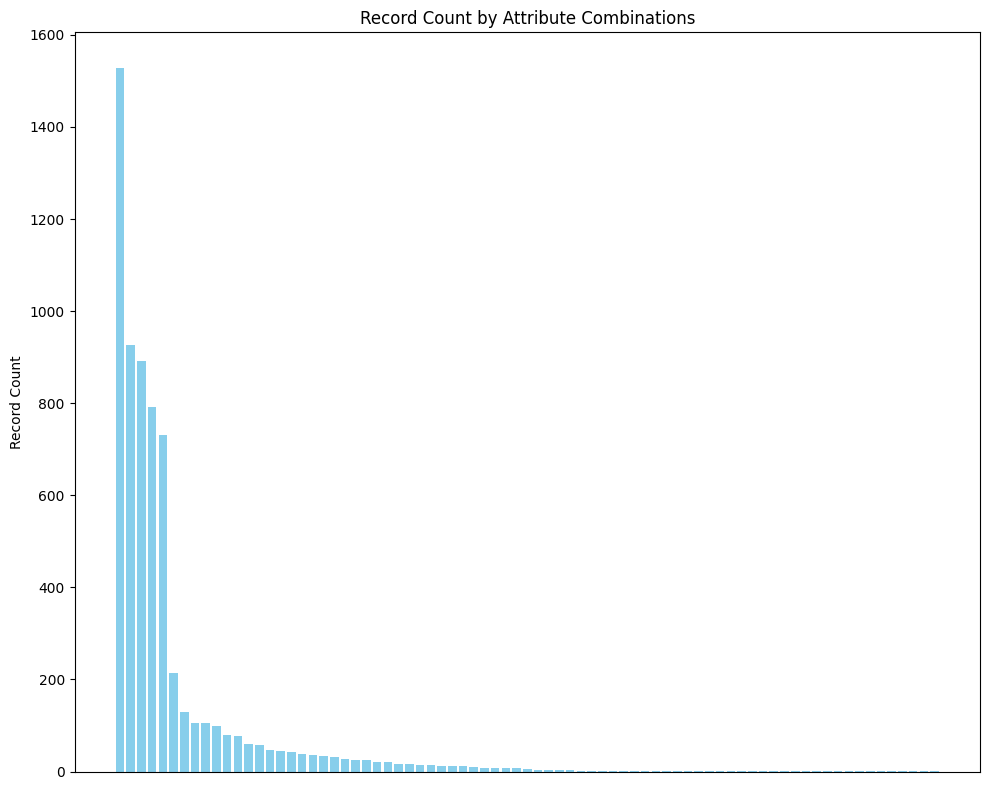

combination_counts: {('Road type', 'Weather'): {('General way', 'Fine'): 1529, ('Highway', 'Fine'): 213, ('General way', 'Cloudy'): 99, ('Under bridge/FO', 'Fine'): 60, ('General way', 'Rainy'): 57, ('Parking lot/Gas station', 'Fine'): 14, ('Highway', 'Cloudy'): 13, ('Undefined', 'Undefined'): 9, ('General way', 'Undefined'): 7, ('General way', 'Snowy'): 7, ('Undefined', 'Fine'): 7, ('Highway', 'Rainy'): 5, ('Parking lot/Gas station', 'Cloudy'): 3, ('Highway', 'Undefined'): 2, ('Tunnel', 'Fine'): 2, ('Tunnel', 'Undefined'): 2, ('General way', 'Foggy'): 2, ('Parking lot/Gas station', 'Snowy'): 1, ('Parking lot/Gas station', 'Undefined'): 1, ('Undefined', 'Cloudy'): 1, ('Under bridge/FO', 'Cloudy'): 1, ('Under bridge/FO', 'Undefined'): 1}, ('Road type', 'Lighting'): {('General way', 'Normal'): 891, ('General way', 'Low'): 731, ('Highway', 'Normal'): 129, ('General way', 'High'): 79, ('Highway', 'Low'): 77, ('Under bridge/FO', 'Normal'): 42, ('Highway', 'High'): 27, ('Under bridge/FO', 'L

<Figure size 640x480 with 0 Axes>

In [16]:
if __name__ == '__main__':
    main()

### #11 License

[required]

In [17]:
ait_owner='AIST'
ait_creation_year='2024'

### #12 Deployment

[uneditable] 

In [18]:
if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_sdk_name, current_dir, requirements_path)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
